<h2>Corona Zahlen Deutschland und Bundesländer, sowie <br> 
    Krankenhausdaten Intensiv Behandlungen in deutschen Krankenhäusern<br>
    im Vergleich zur Belegung durch andere Intensivfälle, sowie <br>
    Entwicklung der Krankenhaus Landschaft, Betten Anzahl, <br>
    Fallzahlen, Belegdauer, cc..</h2>

Letztes Update 31.12.2020

Quelle: https://www.divi.de/register/tagesreport 
        
Daten werden durch Restart des Notebooks täglich aktualisiert

Chart Erstellung mit Plotly (Plotly Python Open Source Graphing Library)

Link: https://plotly.com/python/

In [1]:
from __future__ import print_function
import folium

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#load hospital data
intensiv_org_df=pd.read_csv("https://www.divi.de/joomlatools-files/docman-files/divi-intensivregister-tagesreports-csv/DIVI-Intensivregister_2020-12-31_12-15.csv")
hospital_df=pd.read_csv('data/chart/hospital_beds_clients.csv',sep=';')
germany_df=pd.read_csv('data/act/covid_germany_all.csv', sep=';')
gemeinde_df=pd.read_csv('data/chart/gemeinde_key.csv', sep=';')

#load R-Wert
r_df=pd.read_csv('data/act/r_wert.csv', sep=';')

#counties
county_date_df=pd.read_csv('data/act/german_conf_heald_death_data.csv', sep=';')
county_list_df=pd.read_csv('data/act/german_counties_conf_heald_death.csv', sep=';')
country_list_df=pd.read_csv('data/act/german_d_conf_heald_death.csv', sep=';')

In [3]:
#country_df.head()

<h2>Entwicklung R-Wert 30.11-31.12.2020</h2>

Quelle: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.html

In [4]:
r_df1 = r_df.sort_values('R_Wert', ascending=True)
r_df1.head(30)

,Datum,R_Wert
26,26.12.21,"0,75"
24,24.12.21,"0,77"
25,25.12.21,"0,77"
23,23.12.21,"0,81"
22,22.12.21,"0,86"
21,21.12.21,"0,9"
20,20.12.21,"0,93"
19,19.12.20,"0,97"
18,18.12.20,"0,97"
17,17.12.20,"0,99"


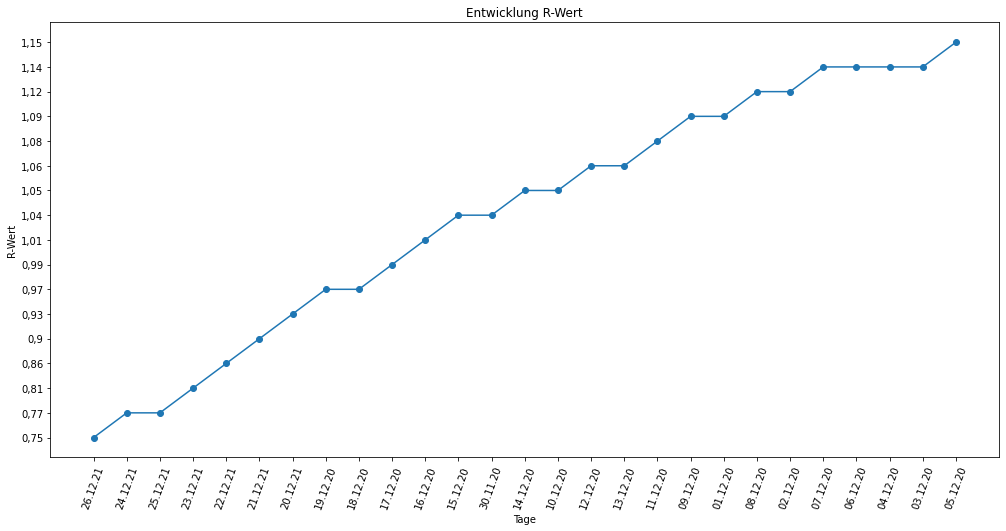

In [5]:
plt.rcParams["figure.figsize"] = (17,8)
plt.xticks(rotation=70)


# Change the line plot below to a scatter plot
plt.scatter(r_df1.Datum, r_df1.R_Wert)
# Make a line plot: year on the x-axis, pop on the y-axis
plt.plot(r_df1.Datum, r_df1.R_Wert)

plt.xlabel('Tage')
plt.ylabel('R-Wert')
plt.title('Entwicklung R-Wert')

# Show plot
plt.show()

<h2>Corona Zahlen Deutschland - Positive-, Geheilte- und Todesfälle</h2>

Quelle: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

In [6]:
country_list_df.head()

,Land,Erkrankte,+/- z. VT,Genesene,+/- z. VT.1,Todesfälle,+/- z. VT.2
0,Deutschland,1.746.929,23.233,1.350.708,26098,33791,510


<h2>Bundesländer 31.12.2020 +/- z. Vortag</h2>
<br>

In [7]:
county_list_df.head(16)

,Bundesland,Land,Erkrankte,+/- z. VT,Genesene,+/- z. VT.1,Todesfälle,+/- z. VT.2
0,Nordrhein-Westfalen,Deutschland,396880,3695,318212,5040,6632,30
1,Bayern,Deutschland,328640,3703,257379,4364,6766,49
2,Baden-Württemberg,Deutschland,240888,2895,184170,3664,4840,51
3,Hessen,Deutschland,138379,1802,106220,1839,2887,42
4,Niedersachsen,Deutschland,135462,3041,97300,3300,3266,127
5,Berlin,Deutschland,108610,1818,90125,1287,2003,36
6,Rheinland-Pfalz,Deutschland,97445,643,77560,1310,1271,24
7,Sachsen,Deutschland,72822,775,52400,1141,1441,13
8,Hamburg,Deutschland,45730,1345,31166,995,1095,40
9,Brandenburg,Deutschland,43278,1244,29597,964,1012,17


In [ ]:
# Plot 
fig = px.line(county_list_df, x='Bundesland', y='Erkrankte')

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Erkrankte'], name='Erkrankte') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Genesene'], name='Genesene') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_list_df['Bundesland'], y=county_list_df['Todesfälle'], name='Todesfälle') # Not what is desired - need a line

fig.update_yaxes(title_text='Erkrankte(R), Genesene(G), Todesfälle(L)')              
              
# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Entwicklung Erkrankte, Genesene, Todesfälle nach Datum 30.11-31.12.2020</h2>

Die Zahlen sind nur die täglichen Zuwächse, keine Gesamtzahlen

In [ ]:
county_date_df.head(100)

In [ ]:
# Plot 
fig = px.line(county_date_df, x='Datum', y='Erkrankte')

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Erkrankte'], name='Erkrankte') # Not what is desired - need a line


# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Genesene'], name='Genesene') # Not what is desired - need a line

# Only thing I figured is - I could do this 
fig.add_scatter(x=county_date_df['Datum'], y=county_date_df['Todesfälle'], name='Todesfälle') # Not what is desired - need a line 

fig.update_yaxes(title_text='Erkrankte(R), Genesene(G), Todesfälle(L)') 

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Corona Test und Positiv Zahlen Deutschland pro KW <br>
und Hochrechnung als würde ab Frühjahr mit gleicher Testkappa getestet</h2>

Quelle: RKI https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Testzahlen-gesamt.xlsx?__blob=publicationFile

In [ ]:
germany_df.head(48)

<h2> Corona Positivkurven RKI (Rot) zu Hochgerechneten Zahlen (Grün) <br>
    wenn man durchgängig ca. 1,3 Mio: Tests pro Tag durchgeführt hätte</h2>

Quelle: Basis https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Testzahl.html

In [ ]:
# Plot 
fig = px.line(germany_df, x='cal_week', y='positiv1')

# Only thing I figured is - I could do this 
fig.add_scatter(x=germany_df['cal_week'], y=germany_df['positiv1'], name='positiv1') # Not what is desired - need a line 

# Only thing I figured is - I could do this 
fig.add_scatter(x=germany_df['cal_week'], y=germany_df['positiv2'], name='positiv2') # Not what is desired - need a line 

fig.update_yaxes(title_text='RKI Zahl(R) zu Hochgerechnete Zahl(G)')

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2> Entwicklung Corona Intensiv Behandlung zu Krankenhaus Betten Belegung in D </h2>

Daten werden durch Restart des Notebooks täglich aktualisiert

Quelle: https://www.divi.de/register/tagesreport

In [ ]:
del intensiv_org_df['gemeindeschluessel']
intensiv_org_df['gemeindeschluessel'] = gemeinde_df
intensiv_org_df.insert(7, "betten_ges", "")
intensiv_org_df.insert(8, "Ant_Covid_a_ges", "")
sum_column = intensiv_org_df["betten_frei"] + intensiv_org_df["betten_belegt"]
intensiv_org_df["betten_ges"] = sum_column
sum_column2 = intensiv_org_df["faelle_covid_aktuell"] / intensiv_org_df["betten_ges"] * 100
intensiv_org_df["Ant_Covid_a_ges"] = sum_column2
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cols = intensiv_org_df.columns.tolist()
# Rearrange the list any way you want
cols = cols[-1:] + cols[:-1]
intensiv_org_df = intensiv_org_df[cols]
intensiv_df = intensiv_org_df

In [ ]:
intensiv_df.head()

In [ ]:
# Betten Gesamt
fig = px.line(intensiv_df, x='gemeindeschluessel', y='betten_ges', title="Auslastung Intensivbetten (Blau Betten ges.)")

# Betten belegt
fig.add_scatter(x=intensiv_df['gemeindeschluessel'], y=intensiv_df['betten_belegt'], name='Betten belegt')# Not what is desired - need a line  

# Covid Fälle Aktuell 
fig.add_scatter(x=intensiv_df['gemeindeschluessel'], y=intensiv_df['faelle_covid_aktuell'], name='von Covid belegt')# Not what is desired - need

# Show plot 
fig.show(renderer="png", width=1000, height=750)

<h2>Entwicklung Anzahl Krankenhäuser, Betten, Fallzahlen und Belegungstage in D</h2>

Jahre 1991 - 2018 (für 2019 und 2020 liegen keine offiziellen Zahlen vor
                   
Quelle: www.gbe-bund.de erstellt am 03.11.2020 

In [ ]:
hospital_sort = hospital_df.sort_values('jahr', ascending=False)

In [ ]:
hospital_sort.head(28)

In [ ]:
hospital_df1 = hospital_df.sort_values('jahr', ascending=True)

fig = px.bar(hospital_df1, x="jahr", y="anzahl_kh", color="anzahl_kh",title='Entwicklung Anzahl Krankenhäuser')
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df2 = hospital_df.sort_values('jahr', ascending=True)

fig = px.bar(hospital_df2, x="jahr", y="betten", color="betten", title="Entwicklung Anzahl Krankenhaus Betten 1991-2018")
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df3 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df3, x="jahr", y="fallzahlen", color="fallzahlen", title='Entwicklung Anz. Krankenhaus Fallzahlen 1991-2018')
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df4 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df4, x="jahr", y="beleg_tage_1000", color="beleg_tage_1000", title='Entwicklung Krankenhaus Belegtage (in Tausend) 1991-2018')
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df5 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df5, x="jahr", y="aerzte", color="aerzte", title='Entwicklung Krankenhaus Aerzte 1994-2017')
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df6 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df6, x="jahr", y="pfleger", color="pfleger", title='Entwicklung Krankenhaus Personal 1994-2017')
fig.show(renderer="png", width=1000, height=750)

In [ ]:
hospital_df7 = hospital_df.sort_values('jahr', ascending=True)
fig = px.bar(hospital_df7, x="jahr", y="sonst_pers", color="sonst_pers", title='Entwicklung Krankenhaus Personal 1994-2017')
fig.show(renderer="png", width=1000, height=750)